In [2]:
import os

import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nltk

sns.set_style('ticks')

INPUT_DIR = '/content/drive/MyDrive/code/atmaCap_8/data/inputs'
OUTPUT_DIR = '/content/drive/MyDrive/code/atmaCap_8/data/outputs/'

os.makedirs(OUTPUT_DIR, exist_ok=True)

train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))

whole_df = pd.concat([train_df, test_df], ignore_index=True)

In [3]:
nltk.download('stopwords', quiet=True)
stop_words = nltk.corpus.stopwords.words('english')
symbol = ["'", '"', ':', ';', '.', ',', '-', '!', '?', "'s"]


In [ ]:
res = []
for c in whole_df['Name'].unique():
    if type(c) == float:
        continue
    else:
        tokens = c.split()
        tokens = [t.lower() for t in tokens if t.lower()
                  not in symbol + stop_words]
        for i in range(len(tokens)):
            weight = i + 1
            res.append((" ".join(tokens[:i+1]).replace(":", ""), weight))

res = pd.DataFrame(res, columns=['name', 'weight'])

In [ ]:
res.groupby(['name'])['weight'].sum().sort_values(ascending=False).head(20)

name
jikkyou powerful pro yakyuu    192
jikkyou powerful pro           150
super                          149
final fantasy                  116
dragon ball z                  111
dragon ball                    110
dragon                         109
mega man                       106
jikkyou powerful               104
super robot taisen              99
mobile suit gundam              96
star wars                       92
super robot                     82
star                            81
world                           79
dance dance revolution          78
nba                             78
shin megami tensei              75
tom clancy's                    72
tiger woods pga tour            72
Name: weight, dtype: int64

In [ ]:
tmp = res.query('weight > 1')
tmp.head()

,name,weight
1,lego batman,2
2,lego batman videogame,3
4,lego indiana,2
5,lego indiana jones,3
6,lego indiana jones original,4


In [ ]:
lego_titles = res.query('name.str.contains("lego")', engine='python')['name'].unique()

print(lego_titles)

['lego' 'lego batman' 'lego batman videogame' 'lego indiana'
 'lego indiana jones' 'lego indiana jones original'
 'lego indiana jones original adventures' 'lego harry' 'lego harry potter'
 'lego harry potter years' 'lego harry potter years 5-7' "lego knights'"
 "lego knights' kingdom" 'lego star' 'lego star wars' 'lego star wars ii'
 'lego star wars ii original' 'lego star wars ii original trilogy'
 'lego star wars complete' 'lego star wars complete saga' 'lego rock'
 'lego rock band' 'lego battles' 'lego harry potter years 1-4'
 'lego star wars iii' 'lego star wars iii clone'
 'lego star wars iii clone wars' 'lego pirates' 'lego pirates caribbean'
 'lego pirates caribbean video' 'lego pirates caribbean video game'
 'lego battles ninjago' 'lego batman 2' 'lego batman 2 dc'
 'lego batman 2 dc super' 'lego batman 2 dc super heroes' 'lego lord'
 'lego lord rings' 'lego marvel' 'lego marvel super'
 'lego marvel super heroes' 'lego friends' 'lego legends'
 'lego legends chima' "lego legends

In [ ]:
import os

# 接頭辞
for i in np.array(res['name'][20:40]):
    for j in np.array(res['name'][20:40]):
        if len(os.path.commonprefix([i, j])) > 1 and i != j:
            print(os.path.commonprefix([i, j]),'　|　',i,' | ',j)
        else:
            print('not match','　|　',i,' | ',j)


not match 　|　 chronicles  |  chronicles
chronicles 　|　 chronicles  |  chronicles narnia
chronicles 　|　 chronicles  |  chronicles narnia lion,
chronicles 　|　 chronicles  |  chronicles narnia lion, witch
chronicles 　|　 chronicles  |  chronicles narnia lion, witch wardrobe
not match 　|　 chronicles  |  golden
not match 　|　 chronicles  |  golden compass
not match 　|　 chronicles  |  circus
not match 　|　 chronicles  |  circus atari
not match 　|　 chronicles  |  maze
not match 　|　 chronicles  |  maze craze
not match 　|　 chronicles  |  maze craze game
not match 　|　 chronicles  |  maze craze game cops
not match 　|　 chronicles  |  maze craze game cops 'n
not match 　|　 chronicles  |  maze craze game cops 'n robbers
not match 　|　 chronicles  |  robert
not match 　|　 chronicles  |  robert ludlum's
not match 　|　 chronicles  |  robert ludlum's bourne
not match 　|　 chronicles  |  robert ludlum's bourne conspiracy
not match 　|　 chronicles  |  tomb
chronicles 　|　 chronicles narnia  |  chronicles
not match 

In [ ]:
# nameを辞書に入れて、その辞書の値に対応するシリーズ物のタイトルを入れる。見つからなければnanがnot mathcにする

series_title_dic = {}

for i in np.array(res['name']):
    tmp_serites_title = 'a'*100
    for j in np.array(res['name']):
        if len(j.split()) == 1:
            tmp_serites_title = j
        else:
            common = os.path.commonprefix([i, j])
            if len(common) > 1 and len(common) <= len(tmp_serites_title):
                tmp_serites_title = common
    
    series_title_dic[i] = tmp_serites_title


KeyboardInterrupt: ignored

In [ ]:
import pprint
pprint.pprint(series_title_dic)

In [ ]:
import json
sd = json.dumps(series_title_dic)

In [ ]:
 fw = open('myu_s.json','w')
#ココ重要！！
# json.dump関数でファイルに書き込む

json.dump(series_title_dic,fw,indent=4)

In [ ]:
res.query('name == "ya"')

,name,weight


In [ ]:
def _replace_series_title(x):
    tokens = x.split()
    tokens = [t.lower() for t in tokens if t.lower()
                not in symbol + stop_words]
    tmp_name = ' '.join(tokens)
    if tmp_name == '':
        res = math.nan
    else:
        res = series_title_dic[tmp_name]
    return res


tmp = res.copy()
tmp['series_title'] = tmp['name'].apply(_replace_series_title)
tmp.head(10)

KeyError: ignored

In [ ]:
train_df['Name'][:20]

0                            LEGO Batman: The Videogame
1           LEGO Indiana Jones: The Original Adventures
2                            LEGO Batman: The Videogame
3                                                Combat
4                          LEGO Harry Potter: Years 5-7
5                          LEGO Harry Potter: Years 5-7
6                                              Yakuza 4
7                          LEGO Harry Potter: Years 5-7
8               The Lord of the Rings: War in the North
9               The Lord of the Rings: War in the North
10    The Chronicles of Narnia: The Lion, The Witch ...
11                         LEGO Harry Potter: Years 5-7
12                                   The Golden Compass
13                                         Circus Atari
14                Maze Craze: A Game of Cops 'n Robbers
15                Robert Ludlum's The Bourne Conspiracy
16                         LEGO Harry Potter: Years 5-7
17                Robert Ludlum's The Bourne Con

In [ ]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


In [ ]:
publiher = train_df['Publisher'][0]
train_df.query('Publisher == @publiher').head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+
5,LEGO Harry Potter: Years 5-7,X360,NaN,Action,Warner Bros. Interactive Entertainment,51,37,0,9,97,77.0,35.0,7.9,39.0,Traveller's Tales,E10+
7,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,Warner Bros. Interactive Entertainment,36,41,0,15,91,76.0,27.0,8.3,48.0,Traveller's Tales,E10+
8,The Lord of the Rings: War in the North,X360,NaN,Action,Warner Bros. Interactive Entertainment,52,24,0,8,84,61.0,48.0,7.4,113.0,Snowblind Studios,M
9,The Lord of the Rings: War in the North,PS3,NaN,Action,Warner Bros. Interactive Entertainment,25,42,1,13,82,63.0,33.0,7,100.0,Snowblind Studios,M
11,LEGO Harry Potter: Years 5-7,DS,NaN,Action,Warner Bros. Interactive Entertainment,34,25,0,7,66,69.0,4.0,tbd,NaN,Traveller's Tales,E10+
16,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,Warner Bros. Interactive Entertainment,18,19,0,3,40,71.0,7.0,6.5,11.0,Traveller's Tales,E10+
23,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,Warner Bros. Interactive Entertainment,10,10,0,6,26,NaN,NaN,tbd,NaN,Traveller's Tales,E10+


In [ ]:
# そのpublisherの出しているGenre数  SalsePortfolioBlockを参考にすればGenrePortfolioが作れる？
publiher = train_df['Publisher'][0]

print(len(train_df.query('Publisher == @publiher')['Genre'].unique()))

9


In [ ]:
# 一杯genreを出している会社は大きいところ？


def _publisher_genre_count(x):
    pub = x['Publisher']
    genre_count = len(tmp_df.query('Publisher == @pub')['Genre'].unique())
    return genre_count




tmp_df = train_df.head(50).copy()




tmp_df['Publisher_Genre_Count'] = tmp_df.apply(_publisher_genre_count,axis=1)
tmp_df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher_Genre_Count
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,1
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+,1
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+,1
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN,4
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+,1


In [ ]:
# 一杯platformで出しているところは移植とかする人気作を持っている？

def _publisher_platform_count(x):
    pub = x['Publisher']
    genre_count = len(whole_df.query('Publisher == @pub')['Platform'].unique())
    return genre_count

tmp_df = train_df.head(50).copy()




tmp_df['Publisher_Platform_Count'] = tmp_df.apply(_publisher_platform_count,axis=1)
tmp_df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher_Platform_Count
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,13
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+,13
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+,13
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN,15
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+,13


In [ ]:
len(whole_df['Platform'].unique())

31

In [ ]:
# whole_df['Rating'].isnull().sum()

"""
E   対象年齢6歳以上。暴力表現などの度合いは少なく、あっても極力デフォルメされており、残虐さや苦痛などを感じさせないよう配慮されている。性的な描写は皆無。
T　　　対象年齢は13歳以上とされ、年齢が満たない場合、購入時には保護者の同意が必要となる。「E」・「E10+」区分より若干表現の度合いが強い。何らかの暗示的な物が含まれている場合もある。
M   対象年齢は17歳以上とされ、年齢が満たない場合、購入には保護者の同意が必要となる。非常に強い暴力表現や間接的な性的表現などが含まれている。
E10+　　対象年齢10歳以上。2005年3月2日にブランクが広かった「E」・「T」区分の中間という位置づけで追加された。
EC  3-6歳を対象としたもの。子供向け教育系のゲームソフトを想定しており、暴力表現などは皆無に等しいレベル。
RP  発売前のタイトルについて、広報資料（ウェブサイトや雑誌広告）などで審査予定または審査中であることを示すときに使用される。
K-A 対象年齢6歳以上。暴力表現などの度合いは少なく、あっても極力デフォルメされており、残虐さや苦痛などを感じさせないよう配慮されている。性的な描写は皆無。
AO  成人指定、18歳未満は購入禁止。直接的な性的表現や、非常に強い暴力表現を含む。



EとK-Aはほぼ同じ

暴力表現があるか否か
AO、Mは暴力表現
"""

whole_df['Rating'].value_counts()



E       3991
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [ ]:
train_df.query('Rating == "K-A"').replace("K-A", 'E')
test_df.query('Rating == "K-A"').replace("K-A", 'E')

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
727,Theme Hospital,PC,1997.0,Strategy,Electronic Arts,NaN,NaN,9,90.0,Bullfrog Productions,E
737,Worms 2,PC,1997.0,Strategy,Microprose,NaN,NaN,8.1,12.0,Team 17,E


In [ ]:
test_df.query('Rating == "RP"').replace("RP", np.nan)

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
102,WRC: FIA World Rally Championship,PC,NaN,Racing,Black Bean Games,65.0,7.0,NaN,NaN,Black Bean Games,NaN
183,Clockwork Empires,PC,NaN,Strategy,Unknown,58.0,7.0,3.8,5.0,Gaslamp Games,NaN


In [ ]:
x = tmp_df.iloc[12]['Rating']
print(x)

if type(x) == str:
    if x.lower() in ['m', 'ao']:
        print('violence')
    else:
        print('not violence')
else:
    print('not nan')


print()

x = tmp_df.iloc[13]['Rating']
print(x)
if type(x) == str:
    if x.lower() in ['m', 'ao']:
        print('violence')
    else:
        print('not violence')
else:
    print('nan')



# _is_violence(tmp_df.iloc[13]['Rating'])

# _is_violence(tmp_df.iloc[13]['Rating'])

E10+
not violence

nan
nan


In [ ]:
x = tmp_df.iloc[13]['Rating']
print(x)
if type(x) == str:
    if x.lower() in ['m', 'ao']:
        print('violence')
    else:
        print('not violence')
else:
    print('nan')

def _is_violence(x):
    if type(x) == str:
        if x.lower() in ['m', 'ao']:
            return 'violence'
        else:
            return 'not_violence'
    else:
        return None


tmp_df = train_df.copy()

tmp_df['Vilolence'] = tmp_df['Rating'].apply(_is_violence)

nan
nan


In [ ]:
tmp_df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Vilolence
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,not_violence
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+,not_violence
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+,not_violence
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN,None
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+,not_violence
5,LEGO Harry Potter: Years 5-7,X360,NaN,Action,Warner Bros. Interactive Entertainment,51,37,0,9,97,77.0,35.0,7.9,39.0,Traveller's Tales,E10+,not_violence
6,Yakuza 4,PS3,NaN,Action,Sega,15,13,63,5,95,78.0,59.0,8,177.0,Ryu ga Gotoku Studios,M,violence
7,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,Warner Bros. Interactive Entertainment,36,41,0,15,91,76.0,27.0,8.3,48.0,Traveller's Tales,E10+,not_violence
8,The Lord of the Rings: War in the North,X360,NaN,Action,Warner Bros. Interactive Entertainment,52,24,0,8,84,61.0,48.0,7.4,113.0,Snowblind Studios,M,violence
9,The Lord of the Rings: War in the North,PS3,NaN,Action,Warner Bros. Interactive Entertainment,25,42,1,13,82,63.0,33.0,7,100.0,Snowblind Studios,M,violence


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

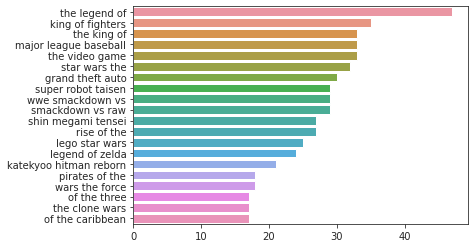

In [ ]:
most_common_bi = get_top_text_ngrams(train_df.Name,20,3)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.show()

In [ ]:
def get_top_text_ngrams(corpus, n, g , s):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items() if sum_words[0, idx] > s]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [ ]:
tmp_df = train_df.copy()

In [ ]:
most_common_bi = get_top_text_ngrams(tmp_df.Name,10000,2,5)
most_common_bi = dict(most_common_bi)

tmp_df["num_Series"] = 0
for i in most_common_bi:
    idx = tmp_df[tmp_df["Name"].str.contains(i)].index
    tmp_df.iloc[idx, -1] = most_common_bi[i]

In [ ]:
tmp_df.query('num_Series >= 1')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Vilolence,num_Series
8,The Lord of the Rings: War in the North,X360,NaN,Action,Warner Bros. Interactive Entertainment,52,24,0,8,84,61.0,48.0,7.4,113.0,Snowblind Studios,M,violence,257
9,The Lord of the Rings: War in the North,PS3,NaN,Action,Warner Bros. Interactive Entertainment,25,42,1,13,82,63.0,33.0,7,100.0,Snowblind Studios,M,violence,257
96,Raiders of the Lost Ark,2600,1981.0,Action,Atari,46,3,0,1,50,NaN,NaN,NaN,NaN,NaN,NaN,None,257
237,The Legend of Zelda: A Link to the Past,SNES,1991.0,Action,Nintendo,242,91,114,13,461,NaN,NaN,NaN,NaN,NaN,NaN,None,18
263,Romance of the Three Kingdoms II,SNES,1991.0,Strategy,Tecmo Koei,0,0,25,0,25,NaN,NaN,NaN,NaN,NaN,NaN,None,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,Atelier Firis: The Alchemist of the Mysterious...,PS4,2016.0,Role-Playing,Tecmo Koei,0,0,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,None,257
8285,Atelier Shallie Plus: Alchemists of the Dusk Sea,PSV,2016.0,Role-Playing,Tecmo Koei,0,0,3,0,3,NaN,NaN,NaN,NaN,Gust,T,not_violence,257
8288,The Legend of Heroes: Trails in the Sky Third ...,PSV,2016.0,Role-Playing,Nihon Falcom Corporation,0,0,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,None,31
8289,Atelier Firis: The Alchemist of the Mysterious...,PSV,2016.0,Role-Playing,Tecmo Koei,0,0,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,None,257


In [ ]:
# train_df.query('Publisher == "Unknown"')['Publisher']
test_df.query('Publisher == "Unknown"')['Publisher'].replace('Unknown', np.nan)

5      NaN
8      NaN
12     NaN
13     NaN
16     NaN
        ..
8168   NaN
8200   NaN
8208   NaN
8214   NaN
8286   NaN
Name: Publisher, Length: 201, dtype: float64

In [ ]:
test_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     185
Genre                 2
Publisher            54
Critic_Score       4199
Critic_Count       4199
User_Score         3176
User_Count         4469
Developer          3134
Rating             3208
dtype: int64

In [ ]:
tmp_df = test_df.copy()

tmp_df.dropna(subset=['Name'], inplace=True)

tmp_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release     185
Genre                 0
Publisher            54
Critic_Score       4197
Critic_Count       4197
User_Score         3174
User_Count         4467
Developer          3132
Rating             3206
dtype: int64

In [ ]:
!pip install simpletransformers
!pip install nltk
!pip install stopwords

     |████████████████████████████████| 204kB 10.4MB/s 
     |████████████████████████████████| 1.1MB 15.3MB/s 
     |████████████████████████████████| 2.9MB 30.7MB/s 
     |████████████████████████████████| 317kB 53.3MB/s 
     |████████████████████████████████| 7.4MB 58.0MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 1.8MB 47.1MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 1.4MB 48.8MB/s 
     |████████████████████████████████| 4.5MB 46.3MB/s 
     |████████████████████████████████| 112kB 61.7MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 163kB 55.0MB/s 
     |████████████████████████████████| 133kB 53.6MB/s 
     |████████████████████████████████| 102kB 14.8MB/s 
     |████████████████████████████████| 890kB 45.5MB/s 
     |████████████████████████████████| 122kB 48.6MB/s 
     |████████████████████████████████| 71kB 11.2MB

     |████████████████████████████████| 51kB 4.6MB/s 
  Created wheel for stopwords: filename=stopwords-0.1.3-py2.py3-none-any.whl size=37285 sha256=7178765a0495feb6ec490c3ba2686f9839577a6b1a7bb6c246cb056b39e37d2f
  Stored in directory: /root/.cache/pip/wheels/39/fa/c7/c4c5111e658f5c58465d948165dc3395a3c10ff57f4cd20356
Successfully built stopwords


In [ ]:
import re
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import STOPWORDS, WordCloud
from simpletransformers.language_representation import RepresentationModel

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly.offline as offline

In [ ]:
DATA_PATH = '/content/drive/MyDrive/code/atmaCap_8/data/inputs/' # Googleドライブをマウントしてそこにデータを置いて作業、適宜パスは変換

train = pd.read_csv(DATA_PATH+'train.csv')
test  = pd.read_csv(DATA_PATH+'test.csv')

# 処理をまとめてやるためにtrainとtestを結合
train_length = len(train) # あとで分離するように長さを保存
train_test   = pd.concat([train, test], ignore_index=True) # indexを再定義
train_test= train_test.fillna('none') # testの'Name'が'nan'が2つほどあったため、また、あとで使うGenreに'nan'があるので'none'に変換

# あんまりstop words周りの処理は詳しくないので、それっぽい処理を適用
# stop wordsの定義更新
nltk.download("stopwords")
stop = set(stopwords.words("english"))
punctuation = list(string.punctuation)

# stopwordsの削除
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            if i.strip().isalpha():
                final_text.append(i.strip())
    return " ".join(final_text)

train_test['Name'] = train_test['Name'].apply(remove_stopwords)

# 'Name'のsentence embeddingsを生成する 参考文献: https://github.com/ThilinaRajapakse/simpletransformers#text-classification
model = RepresentationModel(
        model_type="bert",
        model_name="bert-base-cased",
        use_cuda=True
    )
word_vectors = model.encode_sentences(train_test['Name'], combine_strategy="mean")

train_word_vectors, test_word_vectors = word_vectors[:train_length], word_vectors[train_length:]

np.save(DATA_PATH+'train_sentence_vectors', train_word_vectors)
np.save(DATA_PATH+'test_sentence_vectors.', test_word_vectors)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTextRepresentation: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# 早速作成したsentence embeddingsを読み込んでくる。
train_sentence = np.load(DATA_PATH+'train_sentence_vectors.npy')
test_sentence  = np.load(DATA_PATH+'test_sentence_vectors..npy')

# tsneに突っ込むので結合
train_test_sentence = np.concatenate([train_sentence, test_sentence])

# tsneで次元削減
tsne = TSNE(
    n_components=2, # 削減後の次元数
    random_state=72,
    perplexity=30.0,
    method='barnes_hut',
    n_iter=1000,
    verbose=2
).fit_transform(train_test_sentence)

# tsneで得た2次元表現を、ジャンルごとに色分けした上で、Plotlyで散布図として可視化
traces = []
for genre in set(train_test['Genre'].tolist()):
    idx = train_test.query(f'Genre=="{genre}"').index
    csv_data      = train_test.iloc[idx]
    sentence_data = np.array([tsne[i, :] for i in idx])

    trace = go.Scatter(
        x=sentence_data[:,0],
        y=sentence_data[:,1],
        # z=sentence_data[:,2],
        text=csv_data['Name'], # それぞれの名前用
        mode='markers',
        name=genre, # 右端のリスト
        marker=dict(
            sizemode='diameter',
            colorscale='Portland',
            line=dict(color='rgb(255, 255, 255)'),
            opacity=0.9,
            size=4.2
        )
    )
    traces.append(trace)

layout = dict(height=800, width=800, title='name_sentence_embeddings')
fig    = dict(data=traces, layout=layout)
offline.plot(fig, filename=DATA_PATH+'name_sentence_embeddings.html')

fig = go.Figure(data=traces, layout=layout)
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16719 samples in 1.938s...
[t-SNE] Computed neighbors for 16719 samples in 477.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16719
[t-SNE] Computed conditional probabilities for sample 2000 / 16719
[t-SNE] Computed conditional probabilities for sample 3000 / 16719
[t-SNE] Computed conditional probabilities for sample 4000 / 16719
[t-SNE] Computed conditional probabilities for sample 5000 / 16719
[t-SNE] Computed conditional probabilities for sample 6000 / 16719
[t-SNE] Computed conditional probabilities for sample 7000 / 16719
[t-SNE] Computed conditional probabilities for sample 8000 / 16719
[t-SNE] Computed conditional probabilities for sample 9000 / 16719
[t-SNE] Computed conditional probabilities for sample 10000 / 16719
[t-SNE] Computed conditional probabilities for sample 11000 / 16719
[t-SNE] Computed conditional probabilities for sample 12000 / 16719
[t-SNE] Computed conditional probabilities for s

In [ ]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


# これを参考にKmeansの結果を入れてみる

https://www.guruguru.science/competitions/13/discussions/8c7a3e1b-55f8-4c93-9897-b331346afbfd/

In [ ]:
!pip install texthero

     |████████████████████████████████| 1.4MB 10.4MB/s 
     |████████████████████████████████| 245kB 28.9MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434677 sha256=49963be0f8afb13c0dbe1902df9ffd4c21fc79838867d8dd930676caa4b65e04
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [51]:
import os

import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nltk

sns.set_style('ticks')

INPUT_DIR = '/content/drive/MyDrive/code/atmaCap_8/data/inputs'
OUTPUT_DIR = '/content/drive/MyDrive/code/atmaCap_8/data/outputs/'

os.makedirs(OUTPUT_DIR, exist_ok=True)

train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))

whole_df = pd.concat([train_df, test_df], ignore_index=True)

In [49]:
import texthero as hero
from texthero import preprocessing

import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: ignored

In [ ]:
# カラムを絞る
train_name = train_df[['Name', 'Global_Sales']]
test_name = test_df[['Name']]

In [ ]:
#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                  ]
train_name['clean_Name'] = hero.clean(train_name['Name'], pipeline=custom_pipeline)
test_name['clean_Name'] = hero.clean(test_name['Name'], pipeline=custom_pipeline)

In [ ]:
train_name.head()

,Name,Global_Sales,clean_Name
0,LEGO Batman: The Videogame,306,lego batman the videogame
1,LEGO Indiana Jones: The Original Adventures,234,lego indiana jones the original adventures
2,LEGO Batman: The Videogame,128,lego batman the videogame
3,Combat,125,combat
4,LEGO Harry Potter: Years 5-7,124,lego harry potter years


In [ ]:
df_name = pd.concat([train_name, test_name], axis=0, sort=False).reset_index(drop=True)
df_name

,Name,Global_Sales,clean_Name
0,LEGO Batman: The Videogame,306.0,lego batman the videogame
1,LEGO Indiana Jones: The Original Adventures,234.0,lego indiana jones the original adventures
2,LEGO Batman: The Videogame,128.0,lego batman the videogame
3,Combat,125.0,combat
4,LEGO Harry Potter: Years 5-7,124.0,lego harry potter years
...,...,...,...
16714,SD Gundam G Generation Genesis,NaN,sd gundam g generation genesis
16715,SD Gundam G Generation Genesis,NaN,sd gundam g generation genesis
16716,Battle Worlds: Kronos,NaN,battle worlds kronos
16717,Codename: Panzers Complete Collection,NaN,codename panzers complete collection


In [ ]:
df_name['pca'] = (
    df_name['clean_Name']
    .pipe(hero.tfidf)
    .pipe(hero.pca)
)

#Add k-means cluster to dataframe 
df_name['kmeans'] = (
    df_name['clean_Name']
    .pipe(hero.tfidf)
    .pipe(hero.kmeans)
)

In [ ]:
df_name

,Name,Global_Sales,clean_Name,pca,kmeans
0,LEGO Batman: The Videogame,306.0,lego batman the videogame,"[0.20377525747741723, 0.03218061740078008]",1
1,LEGO Indiana Jones: The Original Adventures,234.0,lego indiana jones the original adventures,"[0.1509013143348027, 0.02049677276547423]",1
2,LEGO Batman: The Videogame,128.0,lego batman the videogame,"[0.20377525747741618, 0.03218061740077954]",1
3,Combat,125.0,combat,"[-0.03536883819868185, -0.017464509558763885]",2
4,LEGO Harry Potter: Years 5-7,124.0,lego harry potter years,"[0.01893444348215762, -0.005166367924525048]",2
...,...,...,...,...,...
16714,SD Gundam G Generation Genesis,NaN,sd gundam g generation genesis,"[-0.04157586792387526, -0.022788903909115508]",2
16715,SD Gundam G Generation Genesis,NaN,sd gundam g generation genesis,"[-0.04157586792387526, -0.022788903909115508]",2
16716,Battle Worlds: Kronos,NaN,battle worlds kronos,"[-0.030968455143633115, -0.01708820832123011]",2
16717,Codename: Panzers Complete Collection,NaN,codename panzers complete collection,"[-0.025994992424324348, -0.016567022154511477]",2


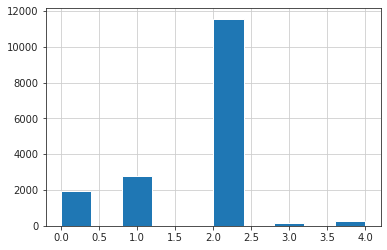

In [ ]:
df_name['kmeans'].hist()

In [ ]:
df_name[~df_name[['Name', 'kmeans']]['Name'].duplicated()]

,Name,Global_Sales,clean_Name,pca,kmeans
0,LEGO Batman: The Videogame,306.0,lego batman the videogame,"[0.20377525747741723, 0.03218061740078008]",1
1,LEGO Indiana Jones: The Original Adventures,234.0,lego indiana jones the original adventures,"[0.1509013143348027, 0.02049677276547423]",1
3,Combat,125.0,combat,"[-0.03536883819868185, -0.017464509558763885]",2
4,LEGO Harry Potter: Years 5-7,124.0,lego harry potter years,"[0.01893444348215762, -0.005166367924525048]",2
6,Yakuza 4,95.0,yakuza,"[-0.03216054254830178, -0.015530991019515723]",2
...,...,...,...,...,...
16712,Mark McMorris Infinite Air,NaN,mark mcmorris infinite air,"[-0.0332959253162448, -0.015849558938778808]",2
16714,SD Gundam G Generation Genesis,NaN,sd gundam g generation genesis,"[-0.04157586792387526, -0.022788903909115508]",2
16716,Battle Worlds: Kronos,NaN,battle worlds kronos,"[-0.030968455143633115, -0.01708820832123011]",2
16717,Codename: Panzers Complete Collection,NaN,codename panzers complete collection,"[-0.025994992424324348, -0.016567022154511477]",2


In [ ]:
kmeans_dic = {}

names = df_name['Name'].to_list()
kmeans = df_name['kmeans'].to_list()
pca = df_name['pca'].to_list()

for name, kv, p in zip(names, kmeans, pca):
    kmeans_dic[name] = {'kmeans': kv, 'pca': p}

    # print(name, kv)

In [ ]:
kmeans_dic['LEGO Batman: The Videogame']

{'kmeans': 1, 'pca': [0.20377525747741618, 0.0321806174007792]}

In [ ]:


train_df['Kmeans'] = train_df['Name'].apply(lambda x : kmeans_dic[x]['kmeans'])
train_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Kmeans
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,1
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+,1
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+,1
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN,2
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Stellaris,PC,2016.0,Strategy,Paradox Interactive,0,4,0,0,4,78.0,57.0,8,569.0,Paradox Development Studio,NaN,2
8355,Total War Attila: Tyrants & Kings,PC,2016.0,Strategy,Koch Media,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2
8356,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2
8357,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,4,0,4,NaN,NaN,NaN,NaN,NaN,NaN,2


In [ ]:

train_df['PCA'] = train_df['Name'].apply(lambda x : kmeans_dic[x]['pca'])
train_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Kmeans,PCA
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,1,"[0.20377525747741618, 0.0321806174007792]"
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+,1,"[0.15090131433480275, 0.020496772765474226]"
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+,1,"[0.20377525747741618, 0.0321806174007792]"
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN,2,"[-0.03536883819868185, -0.017464509558763885]"
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+,2,"[0.018934443482157625, -0.005166367924525029]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Stellaris,PC,2016.0,Strategy,Paradox Interactive,0,4,0,0,4,78.0,57.0,8,569.0,Paradox Development Studio,NaN,2,"[-0.032874771356182324, -0.014872861487828251]"
8355,Total War Attila: Tyrants & Kings,PC,2016.0,Strategy,Koch Media,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2,"[-0.022182282918143757, -0.014674019396207225]"
8356,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2,"[-0.03365216843154534, -0.016064835377696395]"
8357,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,4,0,4,NaN,NaN,NaN,NaN,NaN,NaN,2,"[-0.02516341971238301, -0.018951439275394007]"


In [ ]:
kmeans_dic.keys()

dict_keys(['LEGO Batman: The Videogame', 'LEGO Indiana Jones: The Original Adventures', 'Combat', 'LEGO Harry Potter: Years 5-7', 'Yakuza 4', 'The Lord of the Rings: War in the North', 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe', 'The Golden Compass', 'Circus Atari', "Maze Craze: A Game of Cops 'n Robbers", "Robert Ludlum's The Bourne Conspiracy", 'Tomb Raider (2013)', 'Slot Machine', 'Flag Capture', 'Happy Feet Two', 'Zero: Tsukihami no Kamen', 'Tornado', 'Alex Rider: Stormbreaker', 'Captain America: Super Soldier', 'Adventure', 'Runaway: A Twist of Fate', 'Street Fighter IV', 'Samurai Shodown Anthology', 'Rock Band', 'Donkey Kong Land III', "Disney's Cinderella: Magical Dreams", 'Sabre Wulf', 'Super Breakout', 'Hangman', 'Super Puzzle Fighter II', "Luxor: Pharaoh's Challenge", 'Test Drive Unlimited 2', 'Indy 500', 'Face Racers: Photo Finish', 'Tour de France 2011', 'Ferrari: The Race Experience', 'Monster Hunter 2', 'Custom Robo', 'Disgaea 3: Absence of Detention

# ジャンル別代表ゲームを見てみる

https://www.guruguru.science/competitions/13/discussions/4753329b-e3a6-4660-bd7d-e6e777aca9d4/

In [4]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


In [37]:
# 今回使う関数
def get_label_by_other_label(train, label_name, label, other_label, weights, weights_method):

    # label * other_labelの,value_countsしたdfを作成
    df = train[[other_label, label]]
    df = df.groupby([label])[other_label].value_counts()
    df = df.unstack(level=1).fillna(0).T

    # dfを重みづけ
    if weights is not None:
        # label の重みづけ用に
        weights = train.groupby(other_label, as_index=False).agg({weights:[weights_method]})
        weights.columns = [other_label, "weights"]
        # 一応マージして順番を正しくする
        weights = pd.merge(pd.DataFrame(df.index), weights, on=other_label, how="left")
        df = df.apply(lambda x:x*weights["weights"].values) # 重みづけ

    # 特徴量化
    maker_map = df.idxmax()
    maker_map = pd.DataFrame(maker_map).reset_index().rename(columns={0:label_name})
    output_df = pd.merge(train[[label]], maker_map, on=label, how="left")

    return output_df[[label_name]], maker_map # 見るようにmaker_mapを返してます

In [38]:
output_df = train_df.copy()

output_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


In [46]:
output_df = train_df.copy()

labels = ['Genre', 'Rating', 'Platform', 'Year_of_Release']
# 'Platform', 'Year_of_Release', 'Rating'
# label = "Genre" # other_labelでラベリングされるラベル
other_label = "Name"  # labelをラベリングするラベル
weights = "Global_Sales"  # ラベリングの際の重み
weights_method = "max"  # 重みの計算方法
# label_name_train = "Genre_labeled_Name_train"  # 出力時の名前
# label_name_whole = "Genre_labeled_Name_whole"  # 出力時の名前


labeld = []
for label in labels:
    label_name = f"{label}_labeld_Name"
    labeld.append(label_name)
    _df, name =  get_label_by_other_label(output_df, label_name, label, other_label, weights, weights_method)
    output_df = pd.merge(output_df, name, how='left')

output_df.shape


(8359, 20)

In [47]:
train_df.shape

(8359, 16)

In [26]:
label = "Genre" # other_labelでラベリングされるラベル
other_label = "Name"  # labelをラベリングするラベル
weights = "Global_Sales"  # ラベリングの際の重み
weights_method = "max"  # 重みの計算方法
label_name_train = "Genre_labeled_Name_train"  # 出力時の名前
label_name_whole = "Genre_labeled_Name_whole"  # 出力時の名前


# Genre事の代表ゲーム：Global_salesで重み付
output_df, name_train =  get_label_by_other_label(train_df,label_name_train, label, other_label, weights, weights_method)
output_df, name_whole =  get_label_by_other_label(whole_df,label_name_whole, label, other_label, weights, weights_method)
pd.merge(name_train, name_whole)

,Genre,Genre_labeled_Name_train,Genre_labeled_Name_whole
0,Action,Grand Theft Auto V,Grand Theft Auto V
1,Adventure,Super Mario Land 2: 6 Golden Coins,Myst
2,Fighting,Super Smash Bros. for Wii U and 3DS,Super Smash Bros. for Wii U and 3DS
3,Misc,Minecraft,Minecraft
4,Platform,Super Mario Bros.,Super Mario Bros.
5,Puzzle,Tetris,Tetris
6,Racing,Mario Kart Wii,Mario Kart Wii
7,Role-Playing,The Elder Scrolls V: Skyrim,The Elder Scrolls V: Skyrim
8,Shooter,Duck Hunt,Duck Hunt
9,Simulation,Nintendogs,Nintendogs


In [27]:
label = "Platform"
other_label = "Name"
weights = "Global_Sales"
weights_method = "max"
label_name_train = "Platform_labeled_Name_train"
label_name_whole = "Platform_labeled_Name_whole"

# Platform事の代表ゲーム：Global_Salesで重み付
output_df, name_train =  get_label_by_other_label(train_df,label_name_train, label, other_label, weights, weights_method)
output_df, name_whole =  get_label_by_other_label(whole_df,label_name_whole, label, other_label, weights, weights_method)
pd.merge(name_train, name_whole)


,Platform,Platform_labeled_Name_train,Platform_labeled_Name_whole
0,2600,Pac-Man,Pac-Man
1,3DO,Bust-A-Move,Bust-A-Move
2,3DS,Pokemon X/Pokemon Y,Pokemon X/Pokemon Y
3,DC,Sonic Adventure,Sonic Adventure
4,DS,New Super Mario Bros.,New Super Mario Bros.
5,GB,Super Mario Bros.,Super Mario Bros.
6,GBA,Super Mario World,Super Mario World
7,GC,The Legend of Zelda: Twilight Princess,The Legend of Zelda: Twilight Princess
8,GEN,Sonic the Hedgehog 2,Sonic the Hedgehog 2
9,GG,Sonic the Hedgehog 2 (8-bit),Sonic the Hedgehog 2 (8-bit)


In [28]:
label = "Year_of_Release"
other_label = "Name"
weights = "Global_Sales"
weights_method = "max"
label_name_train = "Year_of_Release_labeled_Name_train"
label_name_whole = "Year_of_Release_labeled_Name_whole"

# year_release事の代表ゲーム：Global_Salesで重み付
output_df, name_train =  get_label_by_other_label(train_df,label_name_train, label, other_label, weights, weights_method)
output_df, name_whole =  get_label_by_other_label(whole_df,label_name_whole, label, other_label, weights, weights_method)
pd.merge(name_train, name_whole)


,Year_of_Release,Year_of_Release_labeled_Name_train,Year_of_Release_labeled_Name_whole
0,1980.0,Asteroids,Asteroids
1,1981.0,Frogger,Frogger
2,1982.0,Pac-Man,Pac-Man
3,1983.0,Baseball,Baseball
4,1984.0,Duck Hunt,Duck Hunt
5,1985.0,Super Mario Bros.,Super Mario Bros.
6,1986.0,The Legend of Zelda,The Legend of Zelda
7,1987.0,Zelda II: The Adventure of Link,Zelda II: The Adventure of Link
8,1988.0,Tetris,Tetris
9,1989.0,Tetris,Tetris


In [29]:
label = "Rating"
other_label = "Name"
weights = "Global_Sales"
weights_method = "max"
label_name_train = "Rating_labeled_Name_train"
label_name_whole = "Rating_labeled_Name_whole"

# Rating事の代表ゲーム：Global_Salesで重み付
output_df, name_train =  get_label_by_other_label(train_df,label_name_train, label, other_label, weights, weights_method)
output_df, name_whole =  get_label_by_other_label(whole_df,label_name_whole, label, other_label, weights, weights_method)
pd.merge(name_train, name_whole)


,Rating,Rating_labeled_Name_train,Rating_labeled_Name_whole
0,AO,Grand Theft Auto: San Andreas,Grand Theft Auto: San Andreas
1,E,Wii Sports,Wii Sports
2,E10+,LEGO Batman: The Videogame,LEGO Batman: The Videogame
3,EC,Sesame Street: Elmo's A-to-Zoo Adventure,Sesame Street: Elmo's A-to-Zoo Adventure
4,K-A,PaRappa The Rapper,PaRappa The Rapper
5,M,Grand Theft Auto V,Grand Theft Auto V
6,RP,Supreme Ruler: Cold War,Supreme Ruler: Cold War
7,T,Star Wars: The Force Unleashed,Star Wars: The Force Unleashed


In [52]:
def _publisher_genre_count(x):
    pub = x['Publisher']
    genre_count = len(whole_df.query('Publisher == @pub')['Genre'].unique())
    return genre_count


# tmp_df = train_df.copy()


train_df['Publisher_Genre_Count'] = train_df.apply(_publisher_genre_count,axis=1)

In [53]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher_Genre_Count
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,9
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+,7
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+,9
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN,12
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+,9


In [54]:
def _publisher_rating_count(x):
    pub = x['Publisher']
    rating_count = len(whole_df.query('Publisher == @pub')['Rating'].unique())
    return rating_count


# tmp_df = train_df.copy()


train_df['Publisher_Rating_Count'] = train_df.apply(_publisher_rating_count,axis=1)

In [55]:
def _publisher_year_of_release_count(x):
    pub = x['Publisher']
    year_of_release_count = len(whole_df.query('Publisher == @pub')['Year_of_Release'].unique())
    return year_of_release_count


# tmp_df = train_df.copy()


train_df['Publisher_Year_of_Release_Count'] = train_df.apply(_publisher_year_of_release_count,axis=1)

In [57]:
def _publisher_platform_count(x):
    pub = x['Publisher']
    platform_count = len(whole_df.query('Publisher == @pub')['Platform'].unique())
    return platform_count


# tmp_df = train_df.copy()


train_df['Publisher_Platform_Count'] = train_df.apply(_publisher_platform_count,axis=1)

In [58]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher_Genre_Count,Publisher_Rating_Count,Publisher_Year_of_Release_Count,Publisher_Platform_Count
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,9,6,14,13
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+,7,4,17,13
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+,9,6,14,13
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN,12,5,24,15
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+,9,6,14,13
